In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import sys
sys.path.append('../')
from utils import *

In [198]:
frames_left=read_video('../input-video/test-left-pitch-1.mp4')
frames_right=read_video('../input-video/test-right-pitch-1.mp4')

In [261]:
nuri_futsal=cv2.imread('img/nuri-futsal.png')

In [321]:
with open('../track-stub/tracks-left-v8m-test(1q-2m).pkl','rb') as pl:
    tracks_left=pickle.load(pl)
with open('../track-stub/tracks-right-v8m-test.pkl','rb') as pr:
    tracks_right=pickle.load(pr)

In [312]:
with open('homography_dict.json','r') as load:
    test_json=json.load(load)
h_left=np.array(test_json['left_homography'])
h_right=np.array(test_json['right_homography'])

In [313]:
for track_id,values in tracks_left['players'][0].items():
    coord_tr=cv2.perspectiveTransform(np.array([np.float32([values['coord_frame']])]),np.float32(h_left))
    coord_tr=[int(i) for i in coord_tr.tolist()[0][0]]
    values['coord_tr']=coord_tr
    
for track_id,values in tracks_right['players'][0].items():
    coord_tr=cv2.perspectiveTransform(np.array([np.float32([values['coord_frame']])]),np.float32(h_right))
    coord_tr=[int(i) for i in coord_tr.tolist()[0][0]]
    values['coord_tr']=coord_tr

In [307]:
frame_homography_left=cv2.warpPerspective(
    frames_left[0].copy(),
    h_left,
    (800,400))
frame_homography_right=cv2.warpPerspective(
    frames_right[0].copy(),
    h_right,
    (800,400))
frame1_concat=np.concatenate((frame_homography_left[:,:401],frame_homography_right[:,400:]),axis=1)

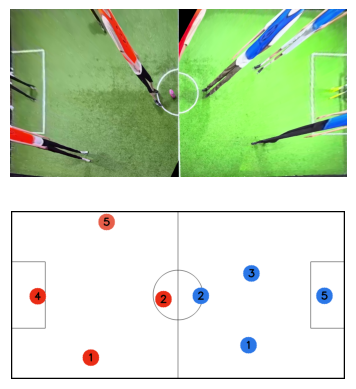

In [317]:
nuri_futsal_copy=nuri_futsal.copy()
for track_id,values in tracks_left['players'][0].items():
    if values['coord_tr'] and values['coord_tr'][0]<401:
        cv2.circle(nuri_futsal_copy,
                values['coord_tr'],
                20,
                values['team_color'],
                cv2.FILLED)
        cv2.putText(nuri_futsal_copy,
                    f'{track_id}',
                    [values['coord_tr'][0]-8,values['coord_tr'][1]+8],
                    cv2.FONT_HERSHEY_SIMPLEX,
                    .8,(0,0,0),2)
    else: pass
for track_id,values in tracks_right['players'][0].items():
    if values['coord_tr'] and values['coord_tr'][0]>400:
        cv2.circle(nuri_futsal_copy,
                values['coord_tr'],
                20,
                values['team_color'],
                cv2.FILLED)
        cv2.putText(nuri_futsal_copy,
                    f'{track_id}',
                    [values['coord_tr'][0]-8,values['coord_tr'][1]+8],
                    cv2.FONT_HERSHEY_SIMPLEX,
                    .8,(0,0,0),2)
    else: pass
figure=plt.figure()
ax1=figure.add_subplot(2,1,1)
ax1.axis('off')
ax2=figure.add_subplot(2,1,2)
ax2.axis('off')
ax1.imshow(cv2.cvtColor(frame1_concat,cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(nuri_futsal_copy,cv2.COLOR_BGR2RGB))
plt.show()

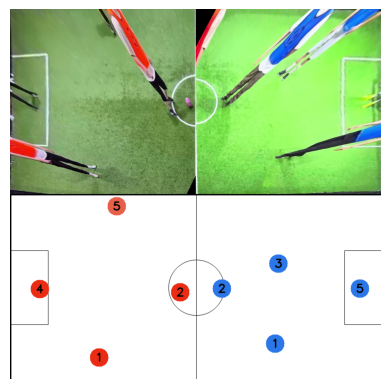

In [332]:
test_concat=np.concatenate((cv2.cvtColor(frame1_concat,cv2.COLOR_BGR2RGB),
                            cv2.cvtColor(nuri_futsal_copy[:400,:801],cv2.COLOR_BGR2RGB)))
plt.imshow(test_concat)
plt.axis('off')
plt.show()

In [324]:
frame1_concat.shape,nuri_futsal_copy.shape

((400, 801, 3), (405, 805, 3))

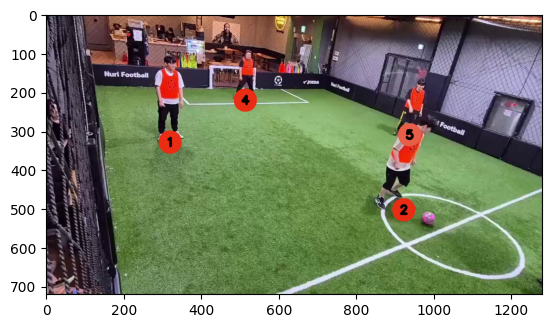

In [228]:
frame1_left_copy=frames_left[0].copy()
for track_id,values in tracks_left['players'][0].items():
    cv2.circle(frame1_left_copy,
               values['coord_frame'],
               30,
               values['team_color'],
               cv2.FILLED)
    cv2.putText(frame1_left_copy,
                f'{track_id}',
                [values['coord_frame'][0]-10,values['coord_frame'][1]+10],
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0,0,0),
                5)
plt.imshow(cv2.cvtColor(frame1_left_copy,cv2.COLOR_BGR2RGB))

In [9]:
left_frame1=cv2.imread('img/frame-1-left.png')
right_frame1=cv2.imread('img/frame-1-right.png')


In [3]:
nuri_futsal=cv2.imread('img/nuri-futsal.png')

In [5]:
nuri_futsal.shape[1]

805

In [6]:
keypoint_left_frame={'BCC':[924,593],'TCC':[1114,515],'BLPA-1':[363,232],'TLPA-1':[669,227],'BLC':[120,184],'TLC':[710,193]}
keypoint_right_frame={'BCC':[337,558],'TCC':[115,503],'BC':[960,708],'BRC':[1003,258],'BRPA-2':[840,255],'TRPA-2':[583,247],'TRC':[480,242],'TRPA-1':[523,271]}
keypoint_true={'BCC':[400,260],'TCC':[400,140],'BLPA-1':[80,280],'TLPA-1':[80,120],'BLC':[0,400],'TLC':[0,0],'BC':[400,400],
               'BRC':[800,400],'BRPA-2':[800,280],'TRPA-2':[800,120],'TRC':[800,0],'TRPA-1':[720,120]}

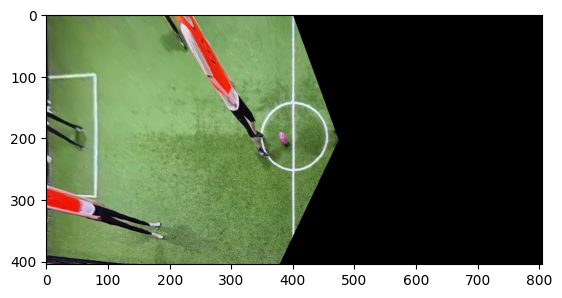

In [10]:
frame_copy=cv2.cvtColor(left_frame1.copy(),cv2.COLOR_BGR2RGB)
keypoint_lf_array=[]
keypoint_tr_array=[]
for kp_name,kp_coord in keypoint_left_frame.items():
    keypoint_lf_array.append(kp_coord)
    keypoint_tr_array.append(keypoint_true[kp_name])
h_left,status=cv2.findHomography(np.array(keypoint_lf_array),np.array(keypoint_tr_array))
frame_homography_left=cv2.warpPerspective(
    frame_copy,
    h_left,
    (nuri_futsal.shape[1],nuri_futsal.shape[0]))
plt.imshow(frame_homography_left)

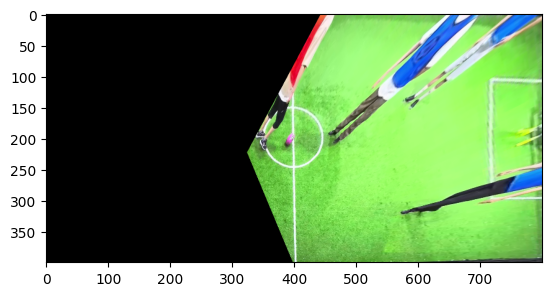

In [11]:
frame_copy=cv2.cvtColor(right_frame1.copy(),cv2.COLOR_BGR2RGB)
keypoint_rt_array=[]
keypoint_tr_array=[]
for kp_name,kp_coord in keypoint_right_frame.items():
    keypoint_rt_array.append(kp_coord)
    keypoint_tr_array.append(keypoint_true[kp_name])
h_right,status=cv2.findHomography(np.array(keypoint_rt_array),np.array(keypoint_tr_array))
frame_homography_right=cv2.warpPerspective(
    frame_copy,
    h_right,
    (800,400))
plt.imshow(frame_homography_right)

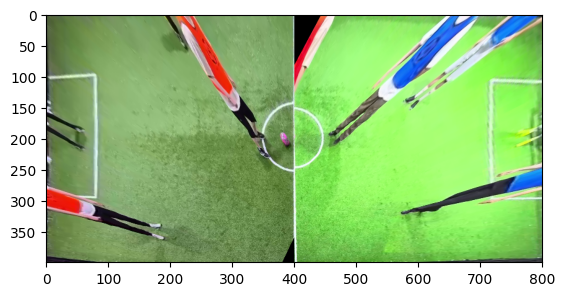

In [189]:
plt.imshow(np.concatenate((frame_homography_left[:,:401],frame_homography_right[:,400:]),axis=1))

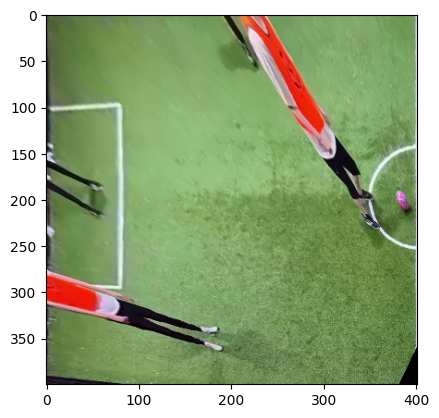

In [181]:
plt.imshow(frame_homography_left[:,:401])

In [13]:
homography_dict={'left_homography':h_left.tolist(),'right_homography':h_right.tolist()}

In [14]:
import json
with open('homography_dict.json','w') as save:
    json.dump(homography_dict,save)

In [171]:
with open('homography_dict.json','r') as load:
    test_json=json.load(load)

In [173]:
np.array(test_json['right_homography'])

array([[-6.47776218e-01, -1.81274410e+00, -3.11842245e+02],
       [-1.19960490e+00, -3.50986450e+00,  1.40990286e+03],
       [-6.32715595e-04, -8.32748109e-03,  1.00000000e+00]])